# Fidelity and First Order Conditions

This notebook analyzes the inclusion of a robustness objective function in the UnitarySmoothPulseProblem function for trajectory optimization. It shows how the robustness objective improves the fidelity of a desired unitary that is subject to a small error pertubation. It also compares the effects on the fidelity when the error term is additive, as opposed to multiplicative in the drive term. 
The notebook is strucuted as follows:
* Imports
* Fidelity Comparison as a function of error
* Additive vs Multiplicative Error Cases

#### Imports

In [ ]:
using Pkg
Pkg.activate(".")
# Pkg.rm("QuantumCollocation")
Pkg.develop(path="../../QuantumCollocation.jl")
using Revise
using QuantumCollocation
using Piccolo
using ForwardDiff
using LinearAlgebra
using PiccoloPlots
using Plots

  Activating project at `~/Documents/research/pulses/project/notebooks/src`
   Resolving package versions...
  No Changes to `~/Documents/research/pulses/project/notebooks/src/Project.toml`
  No Changes to `~/Documents/research/pulses/project/notebooks/src/Manifest.toml`


## 

#### Setup

In [2]:
T = 50
Δt = 0.2
U_goal = GATES.X
H_drive = PAULIS.X
rob_scale = 1 / 8.0
ϵ = 0.1
piccolo_opts = PiccoloOptions(verbose=false)
pretty_print(X::AbstractMatrix) = Base.show(stdout, "text/plain", X); # Helper function


## Comparison of Multiplicative and Additive Errors

In [3]:
# multiplicative system
H_drive_mult(ϵ) = (1 + ϵ) * H_drive
∂ₑHₘ = H_drive
varsys_mult = VariationalQuantumSystem([H_drive_mult(ϵ)], [∂ₑHₘ])

prob_mult_rob = UnitaryVariationalProblem(
    varsys_mult, U_goal, T, Δt;
    variational_scales=[rob_scale],
    robust_times=[[T]],
    piccolo_options=piccolo_opts
)

solve!(prob_mult_rob, max_iter=50, print_level=0)

# additive sysytem

H_drive_add = PAULIS.X
H_drift(ϵ) = ϵ * PAULIS.X
∂ₑHₐ = PAULIS.X
varsys_add = VariationalQuantumSystem(H_drift(ϵ), [H_drive_add], [∂ₑHₐ])

prob_add_rob = UnitaryVariationalProblem(
    varsys_add, U_goal, T, Δt;
    variational_scales=[rob_scale],
    piccolo_options=piccolo_opts
)

solve!(prob_add_rob, max_iter=50, print_level=0)

    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying const

#### Comparison

In [4]:

mult_rob_n = norm(rob_scale * prob_mult_rob.trajectory.Ũ⃗ᵥ1) |> println


println("Multiplcative control: ")
size(prob_mult_rob.trajectory.a) |> println
println("Multiplcative unitary: ")
size(prob_mult_rob.trajectory.Ũ⃗) |> println

println("Additive control: ")
size(prob_add_rob.trajectory.a) |> println
println("Additive unitary: ")
size(prob_add_rob.trajectory.Ũ⃗) |> println


iso_vec_to_operator(prob_mult_rob.trajectory.Ũ⃗[:, end]) |> pretty_print
iso_vec_to_operator(prob_add_rob.trajectory.Ũ⃗[:, end]) |> pretty_print

println("Final fidelity for multiplicative error: ", unitary_rollout_fidelity(prob_mult_rob.trajectory, varsys_mult))
println("Final fidelity additive error: ", unitary_rollout_fidelity(prob_add_rob.trajectory, varsys_add))


28.434339054461688
Multiplcative control: 
(1, 50)
Multiplcative unitary: 
(8, 50)
Additive control: 
(1, 50)
Additive unitary: 
(8, 50)
2×2 Matrix{ComplexF64}:
      0.534947+7.94713e-184im  -7.08457e-184-0.844886im
 -1.39096e-183-0.844886im           0.534947-1.76326e-183im2×2 Matrix{ComplexF64}:
  -2.14295e-5-2.46309e-78im  1.55524e-77-0.999991im
 -4.04906e-77-0.999991im     -2.14295e-5-1.96113e-78imFinal fidelity for multiplicative error: 0.7138317508023275
Final fidelity additive error: 0.9990386562896849


#### Plotting

Starting error magnitude sweep...
Solving for error magnitude: 0.0
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
  Multiplcative fidelity: 0.2

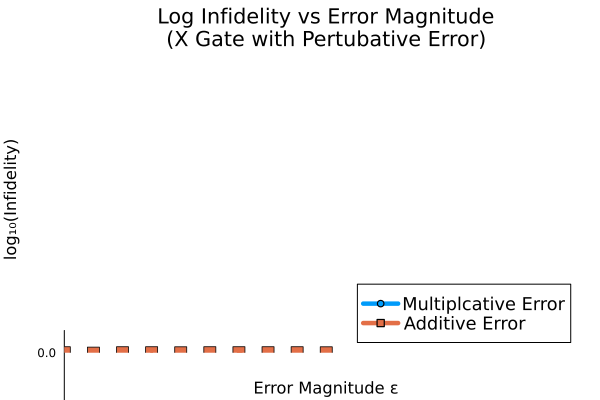

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/samafine1/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/samafine1/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /Users/samafine1/.julia/packages/Plots/uiCPf/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/samafine1/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/samafine1/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /Users/samafine1/.julia/packages/Plots/uiCPf/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/samafine1/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/samafine1/.julia/packages/PlotUtils/dVEMd/src/ticks

In [7]:
using Plots

# Define range of error magnitudes to sweep

error_magnitudes = [x for x in range(0, stop=0.5, length=10)]
mult_infidelities = Float64[]
add_infidelities = Float64[]

println("Starting error magnitude sweep...")

for ε in error_magnitudes
    println("Solving for error magnitude: $ε")

    # Multiplcative case 
    H_drive_mult(ε) = (1 + ε) * H_drive
    ∂ₑHₘ = H_drive
    varsys_mult = VariationalQuantumSystem([H_drive_mult(ε)], [∂ₑHₘ])

    mult_prob = UnitaryVariationalProblem(
        varsys_mult, U_goal, T, Δt;
        variational_scales=[rob_scale],
        robust_times=[[T]],
        piccolo_options=piccolo_opts
    )

    solve!(mult_prob, max_iter=50, print_level=0)
    mult_fidelity = unitary_rollout_fidelity(mult_prob.trajectory, varsys_mult)
    push!(mult_infidelities, 1 - mult_fidelity)
    
    # additive case
    H_drive_add = PAULIS.X
    H_drift(ε) = ε * PAULIS.X
    ∂ₑHₐ = PAULIS.X
    varsys_add = VariationalQuantumSystem(H_drift(ε), [H_drive_add], [∂ₑHₐ])

    add_prob = UnitaryVariationalProblem(
        varsys_add, U_goal, T, Δt;
        variational_scales=[rob_scale],
        piccolo_options=piccolo_opts
    )

    solve!(add_prob, max_iter=50, print_level=0)

    add_fidelity = unitary_rollout_fidelity(add_prob.trajectory, varsys_add)
    push!(add_infidelities, 1 - add_fidelity)
    
    println("  Multiplcative infidelity: $(1 - mult_fidelity)")
    println("  Additive infidelity: $(1 - add_fidelity)")
end

p = plot(error_magnitudes, log10.(mult_infidelities), 
         label="Multiplcative Error", 
         marker=:circle, markersize=6, linewidth=3,
         xlabel="Error Magnitude ε", 
         ylabel="log₁₀(Infidelity)",
         title="Log Infidelity vs Error Magnitude\n(X Gate with Pertubative Error)",
         legendfontsize=12, titlefontsize=14,
         xscale=:log10, grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3)

plot!(p, error_magnitudes, log10.(add_infidelities), 
      label="Additive Error", 
      marker=:square, markersize=6, linewidth=3,
      linestyle=:dash)

display(p)

In [ ]:
err_test = error_magnitudes[2]
println("\nInfidelity comparison at ε = $err_test:")
println("additive: $(add_infidelities[findall(x -> x ≈ 0.3, error_magnitudes)[2]])")
println("Multiplcative: $(mul_infidelities[findall(x -> x ≈ 0.3, error_magnitudes)[2]])")


## Robustness Objective

#### multiplicative system

In [30]:
# base case without robustness
H_drive_mult(ϵ) = (1 + ϵ) * H_drive
∂ₑHₘ = H_drive
varsys_mult = VariationalQuantumSystem([H_drive_mult(ϵ)], [∂ₑHₘ])

prob_mult_base = UnitaryVariationalProblem(
    varsys_mult, U_goal, T, Δt;
    variational_scales=[rob_scale],
    robust_times=[[T]],
    H_err = ϵ * H_drive,
    piccolo_options=piccolo_opts
)

solve!(prob_mult_base, max_iter=50, print_level=0)


println("Base Case Multiplcative control: ")
size(prob_mult_base.trajectory.a) |> println
println("Base Case Multiplcative unitary: ")
size(prob_mult_base.trajectory.Ũ⃗) |> println


iso_vec_to_operator(prob_mult_base.trajectory.Ũ⃗[:, end]) |> pretty_print

println("Final fidelity for base case multiplicative error: ", unitary_rollout_fidelity(prob_mult_base.trajectory, varsys_mult))

# robustness case 
prob_mult_rob = UnitaryVariationalProblem(
    varsys_mult, U_goal, T, Δt;
    variational_scales=[rob_scale],
    robust_times=[[T]],
    H_err = ϵ * H_drive,
    activate_rob_loss=true,
    piccolo_options=piccolo_opts
)

solve!(prob_mult_rob, max_iter=50, print_level=0)


println("robustness case Multiplcative control: ")
size(prob_mult_rob.trajectory.a) |> println
println("robustness case Multiplcative unitary: ")
size(prob_mult_rob.trajectory.Ũ⃗) |> println


iso_vec_to_operator(prob_mult_rob.trajectory.Ũ⃗[:, end]) |> pretty_print

println("Final fidelity for robustness case multiplicative error: ", unitary_rollout_fidelity(prob_mult_rob.trajectory, varsys_mult))


    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
Base Case Multiplcative control: 
(1, 50)
Base Case Multiplcative unitary: 
(8, 50)
2×2 Matrix{ComplexF64}:
      0.675018+1.22976e-196im  -1.28816e-196-0.737801im
 -9.23198e-197-0.737801im           0.675018-1.99684e-196imFinal fidelity for base case multiplicative error: 0.5443503896256227
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying 

#### additive system

In [ ]:
# base case without robustness
H_drive_add(ϵ) = (1 + ϵ) * H_drive
∂ₑHₘ = H_add_drive
varsys_add = VariationalQuantumSystem([H_drive_add(ϵ)], [∂ₑHₘ])

prob_add_base = UnitaryVariationalProblem(
    varsys_add, U_goal, T, Δt;
    variational_scales=[rob_scale],
    robust_times=[[T]],
    H_err = ϵ * H_drive,
    piccolo_options=piccolo_opts
)

solve!(prob_add_base, max_iter=50, print_level=0)


println("Base Case Additive control: ")

size(prob_add_base.trajectory.a) |> println
println("Base Case Additive unitary: ")
size(prob_add_base.trajectory.Ũ⃗) |> println


iso_vec_to_operator(prob_add_base.trajectory.Ũ⃗[:, end]) |> pretty_print

println("Final fidelity for base case Additive error: ", unitary_rollout_fidelity(prob_add_base.trajectory, varsys_add))

# robustness case 
prob_add_rob = UnitaryVariationalProblem(
    varsys_add, U_goal, T, Δt;
    variational_scales=[rob_scale],
    robust_times=[[T]],
    H_err = ϵ * H_drive,
    activate_rob_loss=true,
    piccolo_options=piccolo_opts
)

solve!(prob_add_rob, max_iter=50, print_level=0)


println("robustness case Additive control: ")
size(prob_add_rob.trajectory.a) |> println
println("robustness case Additive unitary: ")
size(prob_add_rob.trajectory.Ũ⃗) |> println


iso_vec_to_operator(prob_add_rob.trajectory.Ũ⃗[:, end]) |> pretty_print

println("Final fidelity for robustness case Additive error: ", unitary_rollout_fidelity(prob_add_rob.trajectory, varsys_add))


#### Testing

In [13]:
# robust case
Z_vec_rob = vec(rob_prob.trajectory)

println(
    "robust Fidelity: ",
    unitary_rollout_fidelity(rob_prob.trajectory, sys)
)

rob_prob.trajectory.a |> size

# non-robust (base) case
Z_vec_base = vec(base_prob.trajectory)

println(
    "non-robust Fidelity: ",
    unitary_rollout_fidelity(base_prob.trajectory, sys)
)

base_prob.trajectory.a |> size

# function FirstOrderObjective(
#     H_err::AbstractMatrix{<:Number},
#     traj::NamedTrajectory,
#     times::AbstractVector{Int};
#     Qs::AbstractVector{<:Float64}=fill(1.0, length(times))
# )

#     Ũ⃗_indices = [collect(slice(k, traj.components.Ũ⃗, traj.dim)) for k=1:traj.T]
        
#     function ℓ(Z::AbstractVector{<:Real})
#         Ũ⃗s = [Z[idx] for idx in Ũ⃗_indices]
#         Us = [iso_vec_to_operator(Ũ⃗) for Ũ⃗ in Ũ⃗s]
#         terms = [U' * H_err * U for U in Us]
#         sum_terms = sum(terms)
#         return real((conj(tr(sum_terms)) * tr(sum_terms))) / real(traj.T^2 * norm(H_err)^2)
#     end

#     ∇ℓ = Z -> ForwardDiff.gradient(ℓ, Z)

#     function ∂²ℓ_structure()
#         Z_dim = traj.dim * traj.T + traj.global_dim
#         structure = spzeros(Z_dim, Z_dim)
#         all_Ũ⃗_indices = vcat(Ũ⃗_indices...)
        
#         for i in all_Ũ⃗_indices
#             for j in all_Ũ⃗_indices
#                 structure[i, j] = 1.0
#             end
#         end
        
#         structure_pairs = collect(zip(findnz(structure)[1:2]...))
#         return structure_pairs
#     end

#     function ∂²ℓ(Z::AbstractVector{<:Real})
#         structure_pairs = ∂²ℓ_structure()
#         H_full = ForwardDiff.hessian(ℓ, Z)
#         ∂²ℓ_values = [H_full[i, j] for (i, j) in structure_pairs]
        
#         return ∂²ℓ_values
#     end

#     return Objective(ℓ, ∇ℓ, ∂²ℓ, ∂²ℓ_structure)
#     end


# # robust case
# jacobian_rob = ForwardDiff.gradient(FirstOrderObjective(Hₑ, rob_prob.trajectory, [T]), Z_vec_rob)
# println("The robust case Jacobian is $jacobian")

# hessian_rob = ForwardDiff.hessian(FirstOrderObjective(Hₑ, rob_prob.trajectory, [T]), Z_vec_rob)
# println("The robust case Hessian is $hessian")

# # non-robust (base) case
# jacobian_base = ForwardDiff.gradient(FirstOrderObjective(Hₑ, base_prob.trajectory, [T]), Z_vec_base)
# println("The base case Jacobian is $jacobian")

# hessian_base = ForwardDiff.hessian(FirstOrderObjective(Hₑ, base_prob.trajectory, [T]), Z_vec_base)
# println("The base case Hessian is $hessian")


robust Fidelity: 0.9878212422402424
non-robust Fidelity: 0.9999755694421306


(2, 50)

In [16]:
using Piccolo
using PiccoloPlots
using SparseArrays
using Random;
Random.seed!(123);

# define the time parameters

T₀ = 10     # total time in ns
T = 50      # number of time steps
Δt = T₀ / T # time step

# define the system parameters
levels = 2
δ = 0.2

# add a bound to the controls
# a_bound = 0.2
# dda_bound = 1.0

# create the system
sys = TransmonSystem(levels = levels, δ = δ)

# let's look at the parameters of the system
sys.params

# define the target operator
op = EmbeddedOperator(:X, sys)

# define the error
a = 0.5
Hₑ = a * PAULIS.Z

# show the full operator
op.operator |> sparse

# create the problems

# with robustness loss included in objective function
rob_prob = UnitarySmoothPulseProblem(
            sys, op, T, Δt;
            H_err=Hₑ, activate_rob_loss=true
        )

solve!(rob_prob, max_iter=50)


println(
    "Robust Fidelity: ",
    unitary_rollout_fidelity(rob_prob.trajectory, sys; subspace = op.subspace),
)



# Base case, without robustness loss included in objective function
base_prob = UnitarySmoothPulseProblem(sys, op, T, Δt; H_err=Hₑ)

solve!(base_prob, max_iter=50)


println(
    "Non-robust Fidelity: ",
    unitary_rollout_fidelity(base_prob.trajectory, sys; subspace = op.subspace),
)

# plot_unitary_populations(base_prob.trajectory)
# plot_unitary_populations(rob_prob.trajectory)



    constructing UnitarySmoothPulseProblem...
	using integrator: typeof(UnitaryIntegrator)
	control derivative names: [:da, :dda]
	applying timesteps_all_equal constraint: Δt
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:     5502
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:   156403

Total number of variables............................:      738
                     variables with only lower bounds:        0
                variables with 

In [ ]:
println(
    "Robust Fidelity: ",
    unitary_rollout_fidelity(rob_prob.trajectory, sys; subspace = op.subspace),
)

println(
    "Non-robust Fidelity: ",
    unitary_rollout_fidelity(base_prob.trajectory, sys; subspace = op.subspace),
)

Robust Fidelity: 0.9999996141542552
Non-robust Fidelity: 0.9999999991604571


#### Comparison

Here we plot the log of the fidelity as the error gets worse.

Starting error magnitude sweep...
Solving for error magnitude: 0.01
    constructing UnitarySmoothPulseProblem...
	using integrator: typeof(UnitaryIntegrator)
	control derivative names: [:da, :dda]
	applying timesteps_all_equal constraint: Δt
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
    constructing UnitarySmoothPulseProblem...
	using integrator: typeof(UnitaryIntegrator)
	control derivative names: [:da, :dda]
	applying timesteps_all_equal constraint: Δt
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value

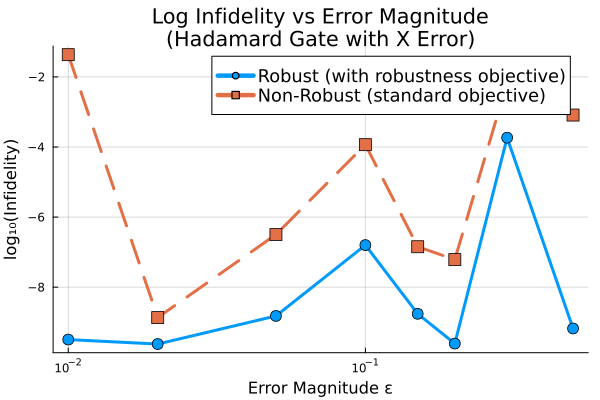

Dict{String, Vector{Float64}} with 3 entries:
  "robust_infidelities" => [3.19907e-10, 2.3849e-10, 1.51055e-9, 1.58872e-7, 1.…
  "error_magnitudes"    => [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
  "base_infidelities"   => [0.0431756, 1.35919e-9, 3.17437e-7, 0.000116799, 1.4…

In [5]:
using Plots # TODO: move this up when you have a chance
# Error magnitude sweep analysis
using PiccoloPlots
using Plots

# Define range of error magnitudes to sweep
error_magnitudes = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
robust_infidelities = Float64[]
base_infidelities = Float64[]

println("Starting error magnitude sweep...")

for ε in error_magnitudes
    println("Solving for error magnitude: $ε")
    
    # Define error Hamiltonian for this magnitude
    Hₑ_sweep = ε * PAULIS.X
    
    # Robust case with robustness objective
    rob_prob_sweep = UnitarySmoothPulseProblem(
        sys, U_goal, T, Δt;
        H_err=Hₑ_sweep, activate_rob_loss=true
    )
    solve!(rob_prob_sweep, max_iter=100, print_level=0)
    rob_fidelity = unitary_rollout_fidelity(rob_prob_sweep.trajectory, sys)
    push!(robust_infidelities, 1 - rob_fidelity)
    
    # Base case without robustness objective
    base_prob_sweep = UnitarySmoothPulseProblem(sys, U_goal, T, Δt; H_err=Hₑ_sweep)
    solve!(base_prob_sweep, max_iter=100, print_level=0)
    base_fidelity = unitary_rollout_fidelity(base_prob_sweep.trajectory, sys)
    push!(base_infidelities, 1 - base_fidelity)
    
    println("  Robust infidelity: $(1 - rob_fidelity)")
    println("  Base infidelity: $(1 - base_fidelity)")
end

p = plot(error_magnitudes, log10.(robust_infidelities), 
         label="Robust (with robustness objective)", 
         marker=:circle, markersize=6, linewidth=3,
         xlabel="Error Magnitude ε", 
         ylabel="log₁₀(Infidelity)",
         title="Log Infidelity vs Error Magnitude\n(Hadamard Gate with X Error)",
         legendfontsize=12, titlefontsize=14,
         xscale=:log10, grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3)

plot!(p, error_magnitudes, log10.(base_infidelities), 
      label="Non-Robust (standard objective)", 
      marker=:square, markersize=6, linewidth=3,
      linestyle=:dash)

println("\nInfidelity comparison at ε = 0.2:")
println("Non-robust: $(base_infidelities[findall(x -> x ≈ 0.2, error_magnitudes)[1]])")
println("Robust: $(robust_infidelities[findall(x -> x ≈ 0.2, error_magnitudes)[1]])")

display(p)

In [ ]:
# set time parameters
T = 50
Δt = 0.2
H_drive = PAULIS.X
U_goal = GATES.X
rob_scale = 1 / 8.0
ϵ = 0.1
piccolo_opts = PiccoloOptions(verbose=false)

#### Without robustness objective

In [10]:
using LinearAlgebra
# multiplicative system
H_drive_mult(ϵ) = (1 + ϵ) * H_drive
∂ₑHₘ = H_drive
varsys_mult = VariationalQuantumSystem([H_drive_mult(ϵ)], [∂ₑHₘ])

prob_mult_rob = UnitaryVariationalProblem(
    varsys_mult, U_goal, T, Δt;
    variational_scales=[rob_scale],
    robust_times=[[T]],
    piccolo_options=piccolo_opts
)

solve!(prob_mult_rob, max_iter=50, print_level=0)

# additive sysytem

H_drive_add = PAULIS.X
H_drift(ϵ) = ϵ * PAULIS.X
∂ₑHₐ = PAULIS.X
varsys_add = VariationalQuantumSystem(H_drift(ϵ), [H_drive_add], [∂ₑHₐ])

prob_add_rob = UnitaryVariationalProblem(
    varsys_add, U_goal, T, Δt;
    variational_scales=[rob_scale],
    piccolo_options=piccolo_opts
)

solve!(prob_add_rob, max_iter=50, print_level=0)

mult_rob_n = norm(rob_scale * prob_mult_rob.trajectory.Ũ⃗ᵥ1) |> println


println("Multiplcative control: ")
size(prob_mult_rob.trajectory.a) |> println
println("Multiplcative unitary: ")
size(prob_mult_rob.trajectory.Ũ⃗) |> println

println("Additive control: ")
size(prob_add_rob.trajectory.a) |> println
println("Additive unitary: ")
size(prob_add_rob.trajectory.Ũ⃗) |> println


iso_vec_to_operator(prob_mult_rob.trajectory.Ũ⃗[:, end]) |> pretty_print
iso_vec_to_operator(prob_add_rob.trajectory.Ũ⃗[:, end]) |> pretty_print

println("Final fidelity for multiplicative error: ", unitary_rollout_fidelity(prob_mult_rob.trajectory, varsys_mult))
println("Final fidelity additive error: ", unitary_rollout_fidelity(prob_add_rob.trajectory, varsys_add))


    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt


UndefVarError: UndefVarError: `norm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing LinearAlgebra in the current active module Main
Hint: a global variable of this name may be made accessible by importing ColorVectorSpace in the current active module Main

#### With Robustness Objective

In [ ]:
# multiplicative system
H_drive_mult(ϵ) = (1 + ϵ) * H_drive
∂ₑHₘ = H_drive
Hₑ = ϵ * H_drive
varsys_mult = VariationalQuantumSystem([H_drive_mult(ϵ)], [∂ₑHₘ])

prob_mult_rob = UnitaryVariationalProblem(
    varsys_mult, U_goal, T, Δt;
    variational_scales=[rob_scale],
    H_err=Hₑ,
    activate_rob_loss=true,
    robust_times=[[T]],
    piccolo_options=piccolo_opts
)

solve!(prob_mult_rob, max_iter=50, print_level=0)

# additive sysytem

H_drive = PAULIS.X
H_drift(ϵ) = ϵ * PAULIS.X
Hₑ = ϵ * PAULIS.X
∂ₑHₐ = PAULIS.X
varsys_add = VariationalQuantumSystem(H_drift(ϵ), [H_drive_add], [∂ₑHₐ])

prob_add_rob = UnitaryVariationalProblem(
    varsys_add, U_goal, T, Δt;
    variational_scales=[rob_scale],
    H_err=Hₑ,
    activate_rob_loss=true,
    piccolo_options=piccolo_opts
)

solve!(prob_add_rob, max_iter=50, print_level=0)

mult_rob_n = norm(rob_scale * prob_mult_rob.trajectory.Ũ⃗ᵥ1) |> println


println("Multiplcative control: ")
size(prob_mult_rob.trajectory.a) |> println
println("Multiplcative unitary: ")
size(prob_mult_rob.trajectory.Ũ⃗) |> println

println("Additive control: ")
size(prob_add_rob.trajectory.a) |> println
println("Additive unitary: ")
size(prob_add_rob.trajectory.Ũ⃗) |> println


iso_vec_to_operator(prob_mult_rob.trajectory.Ũ⃗[:, end]) |> pretty_print
iso_vec_to_operator(prob_add_rob.trajectory.Ũ⃗[:, end]) |> pretty_print

println("Final fidelity for multiplicative error: ", unitary_rollout_fidelity(prob_mult_rob.trajectory, varsys_mult))
println("Final fidelity additive error: ", unitary_rollout_fidelity(prob_add_rob.trajectory, varsys_add))


    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt


#### Comparison Between Additive and Multiplicative